#Author @Orkun_ TEKE- Activation Functions Test Performance
If you want to reach this code list, you can request the list on mail please..

Google colab is the one of the best programming platform for developers and scientists..

You can use this platform free.. 

In this study, I tried to explain this process step by step.. 

If you want to work on COLAB, you have to integrated your Drive with the Colab with activation link.. You have to copy paste your authorization code after running command which I wrote..." 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In this step I want to show you our working system details.. 


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12944386860723283484, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8168925198013843077
 physical_device_desc: "device: XLA_CPU device"]

In [ ]:
!pip install -q keras

Let' s import to all libraires we wiil need.. 

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.python.keras import regularizers 

import tensorflow  as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

Using TensorFlow backend.


Download the dataset.. (I use "MNIST" data which is the one of the most popular image dataset in Tensorflow... 

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


Lets Draw some part of our dataset.. Drawed 45 (15X3) image samples...

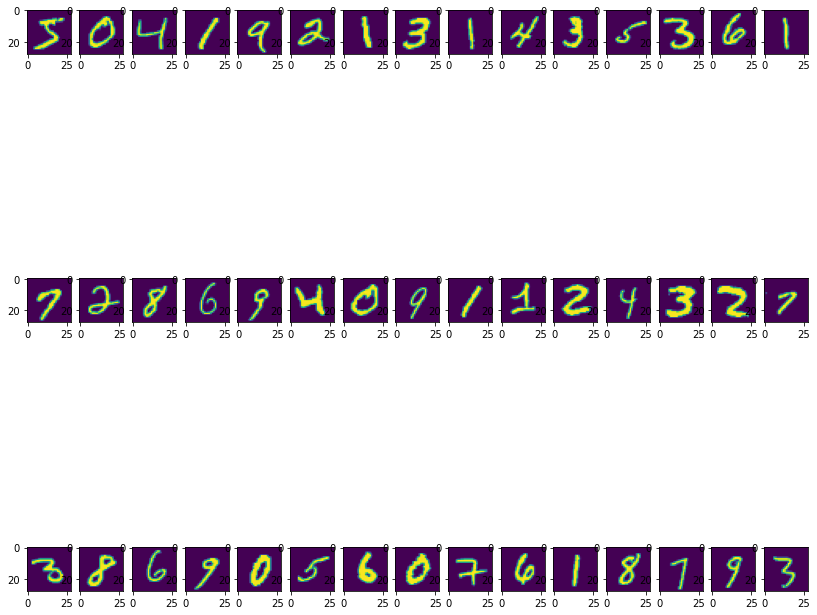

In [ ]:
plt.figure(figsize=(14,14))
x, y = 15, 3 
for i in range(45):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

Configurations... 

In [ ]:
batch_size = 128 # Küme Boyutu
num_classes = 10 # Sınıf Sayısı
epochs = 20 # Eğitimin epoch sayısı
w_l2 = 1e-5 # Başlangıç

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [ ]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# sınıf vektörlerini ikili sınıf matrislerine dönüştürmek
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


SIGMOID FUNCTION 

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)       

TEST AND TRAINING RESULTS OF MODEL (SIGMOID)

In [ ]:
hist_sigmoid=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 190s 3ms/step - loss: 0.5703 - accuracy: 0.8584 - val_loss: 0.2348 - val_accuracy: 0.9562
Epoch 2/20
60000/60000 [==============================] - 189s 3ms/step - loss: 0.2036 - accuracy: 0.9495 - val_loss: 0.2394 - val_accuracy: 0.9355
Epoch 3/20
60000/60000 [==============================] - 190s 3ms/step - loss: 0.1438 - accuracy: 0.9640 - val_loss: 0.3221 - val_accuracy: 0.9035
Epoch 4/20
60000/60000 [==============================] - 190s 3ms/step - loss: 0.1172 - accuracy: 0.9696 - val_loss: 0.1131 - val_accuracy: 0.9683
Epoch 5/20
60000/60000 [==============================] - 190s 3ms/step - loss: 0.1055 - accuracy: 0.9728 - val_loss: 0.0895 - val_accuracy: 0.9772
Epoch 6/20
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0956 - accuracy: 0.9761 - val_loss: 0.1473 - val_accuracy: 0.9602
Epoch 7/20
60000/60000 [==============================] - 189s

HYPERBOLIC TANGENT FUNCTION

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)       

TEST AND TRAINING RESULTS OF MODEL (HYPERBOLIC TANG) 


In [ ]:
hist_tanh=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 194s 3ms/step - loss: 0.1848 - accuracy: 0.9461 - val_loss: 0.2493 - val_accuracy: 0.9212
Epoch 2/20
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0816 - accuracy: 0.9777 - val_loss: 0.0663 - val_accuracy: 0.9801
Epoch 3/20
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0667 - accuracy: 0.9823 - val_loss: 0.0865 - val_accuracy: 0.9724
Epoch 4/20
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0622 - accuracy: 0.9834 - val_loss: 0.0751 - val_accuracy: 0.9790
Epoch 5/20
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0586 - accuracy: 0.9853 - val_loss: 0.1369 - val_accuracy: 0.9594
Epoch 6/20
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0526 - accuracy: 0.9868 - val_loss: 0.0894 - val_accuracy: 0.9746
Epoch 7/20
60000/60000 [==============================] - 193s

RECTIFIED LINEAR UNIT (ReLU) FUNCTION 

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)       

TEST AND TRAINING RESULTS OF MODEL (ReLU) 


In [ ]:
hist_relu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 195s 3ms/step - loss: 0.1828 - accuracy: 0.9512 - val_loss: 0.1637 - val_accuracy: 0.9591
Epoch 2/20
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0780 - accuracy: 0.9793 - val_loss: 0.0525 - val_accuracy: 0.9843
Epoch 3/20
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0630 - accuracy: 0.9834 - val_loss: 0.0564 - val_accuracy: 0.9842
Epoch 4/20
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0570 - accuracy: 0.9854 - val_loss: 0.0511 - val_accuracy: 0.9853
Epoch 5/20
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0521 - accuracy: 0.9873 - val_loss: 0.0522 - val_accuracy: 0.9866
Epoch 6/20
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0465 - accuracy: 0.9896 - val_loss: 0.0436 - val_accuracy: 0.9902
Epoch 7/20
60000/60000 [==============================] - 194s

#Leaky Relu is the advanced activation function. So, you must import this function from "Keras"

In [ ]:
from keras.layers.advanced_activations import LeakyReLU

LEAKY ReLU FUNCTION 

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.001))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
dense_7 (Dense)              (None, 24, 24, 64)        4160      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 24, 24, 64)       

TEST AND TRAINING RESULTS OF MODEL (LEAKY ReLU) 


In [ ]:
hist_LeakyReLU=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 222s 4ms/step - loss: 0.1816 - accuracy: 0.9463 - val_loss: 0.2305 - val_accuracy: 0.9233
Epoch 2/20
60000/60000 [==============================] - 222s 4ms/step - loss: 0.0808 - accuracy: 0.9774 - val_loss: 0.0880 - val_accuracy: 0.9760
Epoch 3/20
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0642 - accuracy: 0.9826 - val_loss: 0.0614 - val_accuracy: 0.9826
Epoch 4/20
60000/60000 [==============================] - 224s 4ms/step - loss: 0.0579 - accuracy: 0.9848 - val_loss: 0.0558 - val_accuracy: 0.9848
Epoch 5/20
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0555 - accuracy: 0.9857 - val_loss: 0.0617 - val_accuracy: 0.9847
Epoch 6/20
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0498 - accuracy: 0.9876 - val_loss: 0.0674 - val_accuracy: 0.9820
Epoch 7/20
60000/60000 [==============================] - 223s

#SWISH FUNCTION 

In [ ]:
def swish(x):
    return x * K.sigmoid(x)
    # return x * (1/(1 + K.exp(-x)))

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_11 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)       

In [ ]:
hist_swish=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 208s 3ms/step - loss: 0.1613 - accuracy: 0.9563 - val_loss: 0.0573 - val_accuracy: 0.9853
Epoch 2/20
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0717 - accuracy: 0.9816 - val_loss: 0.0440 - val_accuracy: 0.9890
Epoch 3/20
60000/60000 [==============================] - 208s 3ms/step - loss: 0.0563 - accuracy: 0.9864 - val_loss: 0.0413 - val_accuracy: 0.9905
Epoch 4/20
60000/60000 [==============================] - 208s 3ms/step - loss: 0.0473 - accuracy: 0.9887 - val_loss: 0.0410 - val_accuracy: 0.9894
Epoch 5/20
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0467 - accuracy: 0.9897 - val_loss: 0.0431 - val_accuracy: 0.9891
Epoch 6/20
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0416 - accuracy: 0.9916 - val_loss: 0.0417 - val_accuracy: 0.9910
Epoch 7/20
60000/60000 [==============================] - 208s

#Must define "Drawning Functions" for Comparing Training Performance on Graphics

In [ ]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acc': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_acc': 'valid. accuracy', 'acc': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['Sigmoid', 'tanh', 'ReLU', 'Leaky_ReLU'], loc=loc)  

    plt.show()

In [ ]:
hists = [hist_sigmoid, hist_tanh, hist_relu, hist_LeakyReLU]

#COMPARING OF RESULTS 
1- VALIDATION ACC. 
2- TRAINING ACC. 
3- VALIDATION LOSS 
4- TRAINING LOSS

In [ ]:
plot_history(hists, attribute='val_acc',axis=(-0.5,20,0.87,0.9960,), loc='lower right')

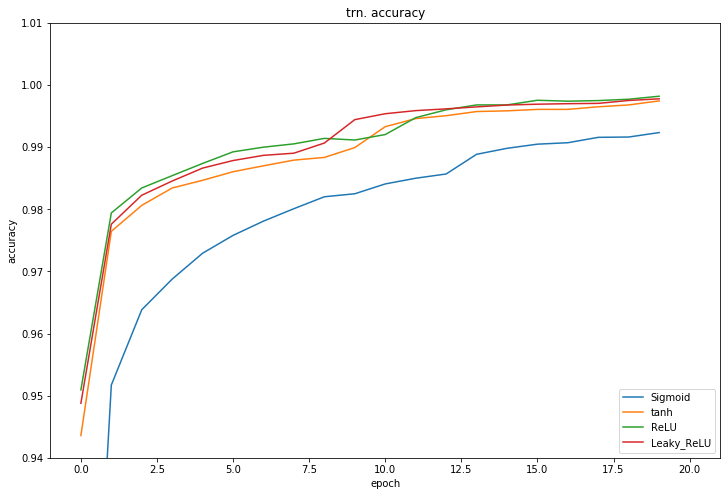

In [ ]:
plot_history(hists, attribute='acc', axis=(-1,21,0.94,1.01), loc='lower right')

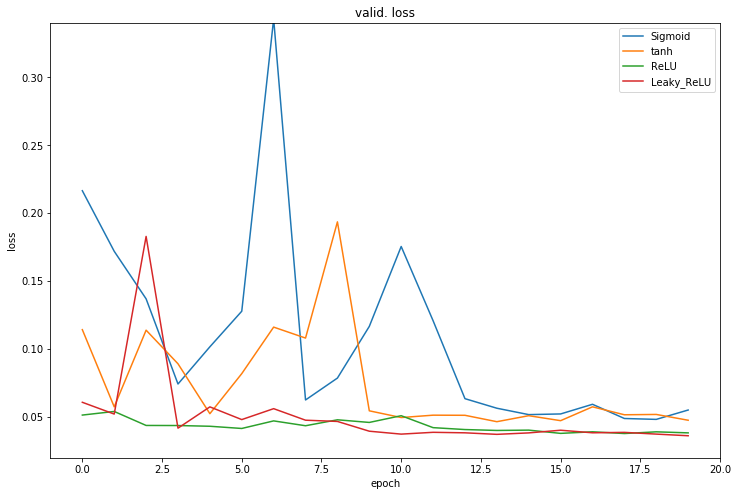

In [ ]:
plot_history(hists, attribute='val_loss', axis=(-1,20,0.02,0.34), loc='upper right')

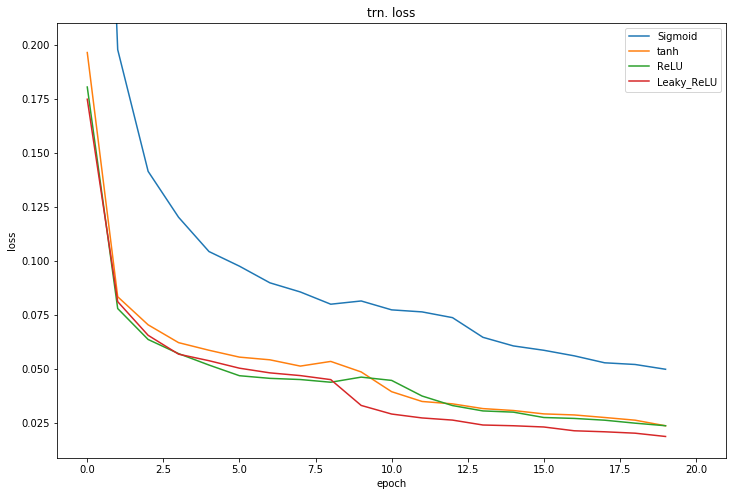

In [ ]:
plot_history(hists, attribute='loss', axis=(-1,21,0.009,0.21), loc='upper right')

In [ ]:
#As you can see, ReLU is the best choose for image data like MNIST... But, please don' t forget it, the best function is what you need one according to your problem and data type :)